In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon
from ShallowLearn import LoadData
from ShallowLearn.Training import reshape_data
import matplotlib.pyplot as plt
from  ShallowLearn import Transform

In [2]:
from ShallowLearn import ImageHelper

In [9]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [10]:
img_test = ImageHelper.load_img(dir_list[5])

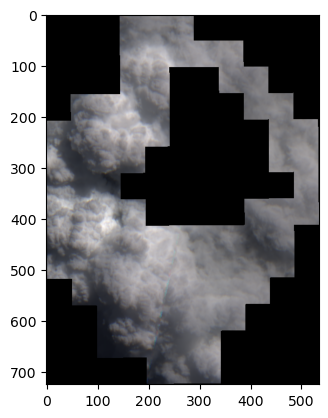

In [11]:
ImageHelper.plot_rgb(img_test, plot = True)


In [19]:
from PIL import Image
img_arr = ImageHelper.plot_rgb(Transform.LCE_multi(img_test), plot= False)
image = Image.fromarray(img_arr)
image.save("output.png")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

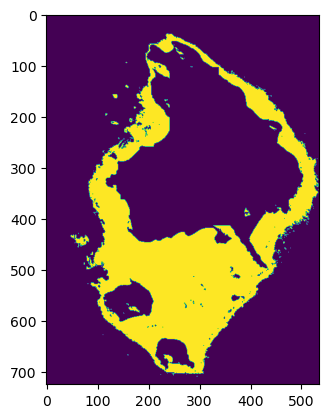

In [12]:
img_test = ImageHelper.load_img(dir_list[6])
plt.imshow(ImageHelper.predict_mask(img_test, 6))


In [13]:
rescaled_image = ImageHelper.generate_multichannel_mask(img_test, mask_val = 6)

In [14]:

lab_image = ImageHelper.plot_lab(rescaled_image)

In [15]:
lab_image.shape

(725, 534, 3)

In [16]:
np.unique(rescaled_image[:,:,0])

array([  0, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 254,
       255], dtype=uint16)

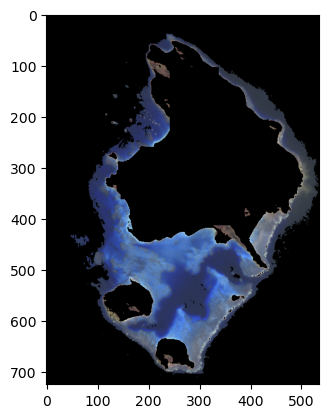

In [17]:
ImageHelper.plot_rgb(rescaled_image, plot = True)

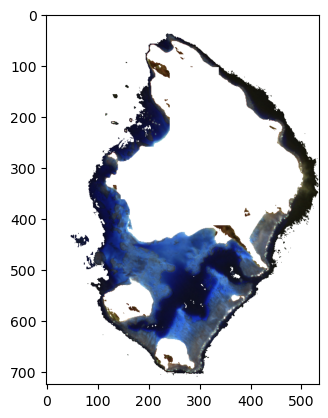

In [12]:
ImageHelper.plot_rgb(Transform.LCE_multi(rescaled_image), plot= True)

In [14]:
lab_mask = lab_image[:,:,0] > 40

In [15]:
lab_values = ImageHelper.generate_multichannel_mask(rescaled_image, np.uint8(lab_mask), 1)

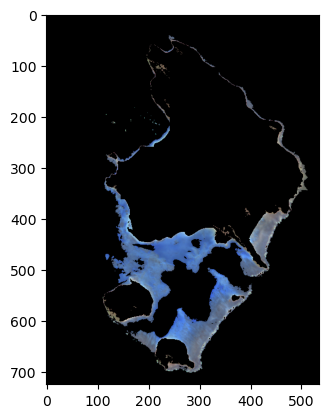

In [18]:
ImageHelper.plot_rgb(lab_values, plot = True)

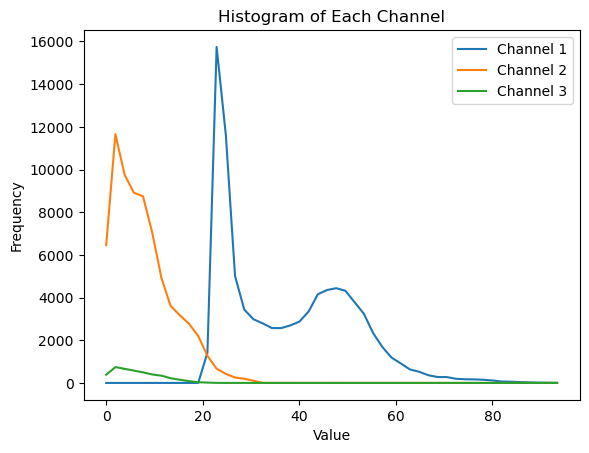

In [19]:
ImageHelper.plot_histograms(lab_image)

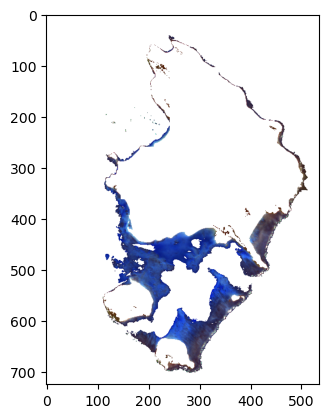

In [22]:
ImageHelper.plot_rgb(Transform.LCE_multi(lab_values), plot = True)

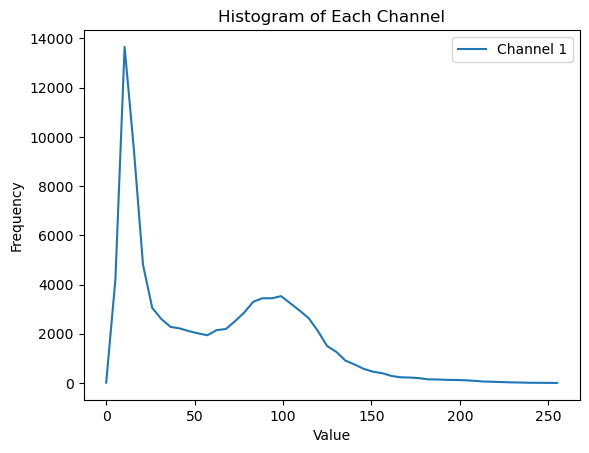

In [26]:
ImageHelper.plot_histograms(Transform.linear_contrast_enhancement(np.expand_dims(lab_image[:,:,0], axis = 2)))

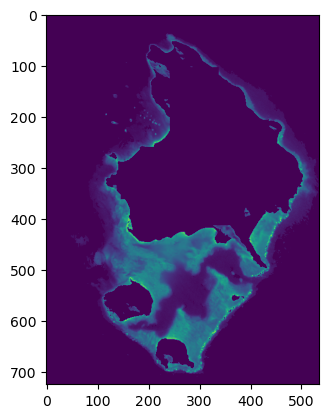

In [27]:
plt.imshow(Transform.linear_contrast_enhancement(np.expand_dims(lab_image[:,:,0], axis = 2)))

In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
#     # Define the pipeline
# my_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=2)),
#     ('kmeans', KMeans(n_clusters=5, init='k-means++', random_state=42))
# ])


In [66]:
# import joblib
# joblib.dump(my_pipeline, '/home/ziad/Documents/Github/ShallowLearn/Models/lab_pipeline_pca2_k5.pkl')

In [67]:
import joblib
my_pipeline = joblib.load('/home/ziad/Documents/Github/ShallowLearn/Models/lab_pipeline_pca2_k5.pkl')

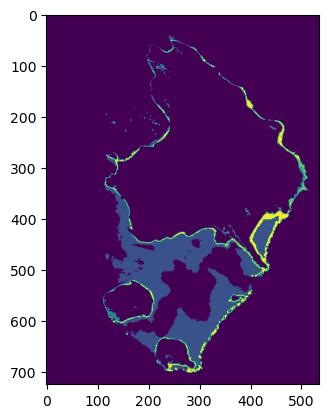

In [68]:
rescaled_image = lab_values
my_pipeline.fit(rescaled_image.reshape(rescaled_image.shape[0] * rescaled_image.shape[1], rescaled_image.shape[2]))
pred = my_pipeline.predict(rescaled_image.reshape(rescaled_image.shape[0] * rescaled_image.shape[1], rescaled_image.shape[2]))
plt.imshow(pred.reshape(rescaled_image.shape[0] , rescaled_image.shape[1]))

In [26]:
ImageHelper.plot_rgb(rescaled_image)

IndexError: index 4 is out of bounds for axis 2 with size 3

In [109]:
df = pd.DataFrame()
for image in dir_list:
    img_test = ImageHelper.load_img(image)
    rescaled_image = ImageHelper.generate_multichannel_mask(img_test, mask_val = 6)
    lab_image = ImageHelper.plot_lab(rescaled_image)[:,:,0]
    print(lab_image.shape)
    df_2 = pd.DataFrame(lab_image.flatten()).T
    df_2 = df_2.replace(0, np.nan).T
    df_2 = df_2.describe().T
    df_2['Name'] = image
    df = pd.concat([df,df_2])


(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)


/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255


(725, 534)
(725, 534)


/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255


(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)
(725, 534)


/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255


(725, 534)
(725, 534)
(725, 534)


/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/ImageHelper.py:130: RuntimeWarning: invalid value encountered in divide
  rescaled_image[:, :, i] = (final_mask[:, :, i] - channel_min) / (channel_max - channel_min) * 255


In [113]:
df.dropna(inplace=True)

In [115]:
for i in df.Name:
    print(i)

/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160721T004002no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160820T003712no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160909T003702no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20170308T003701no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20170507T003711no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20170706T003701no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20170716T004001no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20180502T003711no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20180731T003711no_transform.tiff
/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20180919T003701no_transform.tiff
/media/zia

In [122]:

# Extract date using regex search
df['Date'] = df['Name'].str.extract(r'(\d{8})')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [129]:
df = df[df['count'] > 10000]

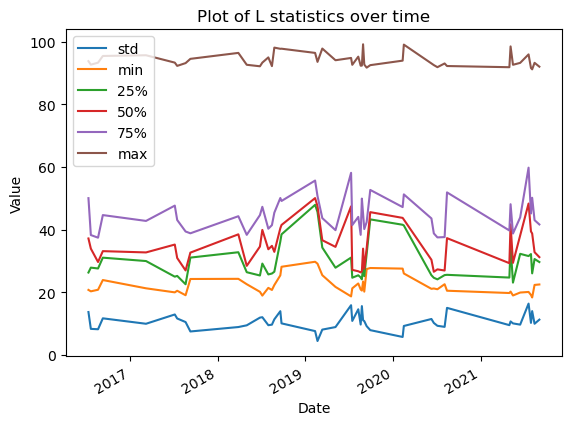

In [131]:
columns_to_plot = ['std', 'min', '25%', '50%', '75%', 'max']

# Create a new DataFrame with the desired columns
df_plot = df[['Date'] + columns_to_plot]

# Set 'Date' as the index
df_plot.set_index('Date', inplace=True)

# Plot the selected columns
df_plot.plot(kind='line')

# Set the plot title and axis labels
plt.title('Plot of L statistics over time')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()